In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Constants
IMAGE_SIZE = (64, 64)  # The size the model was trained on
MODEL_PATH = 'tomato_disease_classifier.h5'
DISEASE_CLASSES = ["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___healthy","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___Tomato_Yellow_Leaf_Curl_Virus"]  # Replace with your actual classes



In [ ]:
# Load the saved model
model = load_model("/content/tomato_disease_classifier.h5")

# Image loading and preprocessing function
def load_and_preprocess_image(image_path):

    img = cv.imread(image_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.resize(img, IMAGE_SIZE)
    img = img / 255.0  # Normalize pixel values
    return img

# Prediction function
def predict_disease(image_path):

    processed_image = load_and_preprocess_image(image_path)
    img_array = np.expand_dims(processed_image, axis=0)  # Add a batch dimension

    prediction = model.predict(img_array)[0]
    predicted_class_index = np.argmax(prediction)
    predicted_class = DISEASE_CLASSES[predicted_class_index]

    return predicted_class, prediction


1/1 [==============================] - 0s 23ms/step


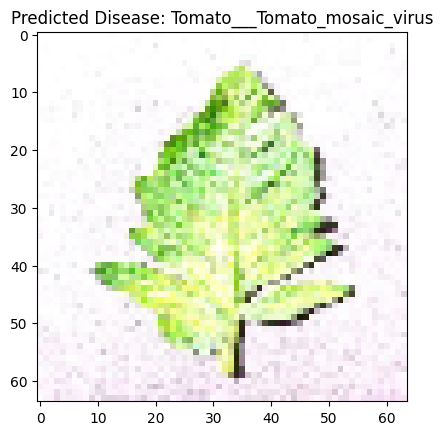

In [ ]:
test_image_path = '/content/feabce4c-9bb1-4fca-bcbf-368cacd40a68___PSU_CG 2115_newPixel25.JPG'
predicted_disease, probabilities = predict_disease(test_image_path)

# Load and display the test image
img = load_and_preprocess_image(test_image_path)


plt.figure()
plt.imshow(img)
plt.title(f"Predicted Disease: {predicted_disease}")
plt.show()
